In [1]:
import numpy as np
import pandas as pd

In [2]:
movies=pd.read_csv('tmdb_5000_movies.csv')
credits=pd.read_csv('tmdb_5000_credits.csv')

In [3]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [4]:
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [5]:
movies=movies.merge(credits,left_on="id",right_on="movie_id")

In [6]:
movies=movies[['movie_id','title_x','overview','genres','keywords','cast','crew']]

In [7]:
movies.isnull().sum()

movie_id    0
title_x     0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [8]:
movies.dropna(inplace=True)

In [9]:
movies.duplicated().sum()

0

In [10]:
import ast
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [11]:
def convert(obj):
    L=[]
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L


In [12]:
movies['genres']=movies['genres'].apply(convert)

In [13]:
movies['keywords']=movies['keywords'].apply(convert)

In [14]:
def convert3(obj):
    L=[]
    counter = 0
    for i in ast.literal_eval(obj):
        if counter != 3:
            L.append(i['name'])
            counter+=1
        else:
            break
    return L


In [15]:
movies['cast']=movies['cast'].apply(convert3)

In [16]:
def fetch_director(obj):
    L=[]
    for i in ast.literal_eval(obj):
        if i['job']=='Director':
            L.append(i['name'])
            break
    return L


In [17]:
movies['crew']=movies['crew'].apply(fetch_director)

In [18]:
movies['overview']=movies['overview'].apply(lambda x:x.split())

In [19]:
movies['genres']=movies['genres'].apply(lambda x:[i.replace(" ","")for i in x])
movies['keywords']=movies['keywords'].apply(lambda x:[i.replace(" ","")for i in x])
movies['cast']=movies['cast'].apply(lambda x:[i.replace(" ","")for i in x])
movies['crew']=movies['crew'].apply(lambda x:[i.replace(" ","")for i in x])

In [20]:
movies['tags']=movies['overview']+movies['genres']+movies['keywords']+movies['cast']+movies['crew']

In [21]:
movies.head(1)

,movie_id,title_x,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."


In [22]:
new_df = movies[['movie_id','title_x','tags']]

In [23]:
new_df['tags']=new_df['tags'].apply(lambda x:" ".join(x))

C:\Users\Admin\AppData\Local\Temp\ipykernel_10604\487797088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(lambda x:" ".join(x))


In [24]:
new_df['tags']=new_df['tags'].apply(lambda x:x.lower())

C:\Users\Admin\AppData\Local\Temp\ipykernel_10604\4224080999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(lambda x:x.lower())


In [25]:
new_df.head(1)

,movie_id,title_x,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [27]:
vectors=cv.fit_transform(new_df['tags']).toarray()

In [28]:
#movie names in the form of vectors
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
import nltk

In [30]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [31]:
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [32]:
new_df['tags']=new_df['tags'].apply(stem)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10604\3514595201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(stem)


In [33]:
new_df['tags'][0]

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron'

In [34]:
stem('in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron')

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron'

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

In [36]:
cosine_similarity(vectors)

array([[1.        , 0.08980265, 0.05986843, ..., 0.02457366, 0.02777778,
        0.        ],
       [0.08980265, 1.        , 0.06451613, ..., 0.02648136, 0.        ,
        0.        ],
       [0.05986843, 0.06451613, 1.        , ..., 0.02648136, 0.        ,
        0.        ],
       ...,
       [0.02457366, 0.02648136, 0.02648136, ..., 1.        , 0.07372098,
        0.04721922],
       [0.02777778, 0.        , 0.        , ..., 0.07372098, 1.        ,
        0.05337605],
       [0.        , 0.        , 0.        , ..., 0.04721922, 0.05337605,
        1.        ]])

In [37]:
similarity = cosine_similarity(vectors)

In [38]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:6]

[(539, 0.25724787771376323),
 (1191, 0.2545875386086578),
 (507, 0.24948506639458295),
 (1213, 0.24595492912420727),
 (260, 0.2434322477800738)]

In [39]:
def recommend(movie):
    movie_index=new_df[new_df['title_x']==movie].index[0]
    distances=similarity[movie_index]
    movies_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:11]
    for i in movies_list:
        print(new_df.iloc[i[0]].title_x)

In [40]:
recommend('Avatar')

Titan A.E.
Small Soldiers
Independence Day
Aliens vs Predator: Requiem
Ender's Game
Predators
Lifeforce
Battle: Los Angeles
Falcon Rising
Krull


In [41]:
import pickle

In [42]:
pickle.dump(new_df.to_dict(),open('movies_dict.pkl','wb'))

In [43]:
new_df['title_x'].values

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., 'Signed, Sealed, Delivered', 'Shanghai Calling',
       'My Date with Drew'], dtype=object)

In [44]:
pickle.dump(similarity,open('similarity.pkl','wb'))

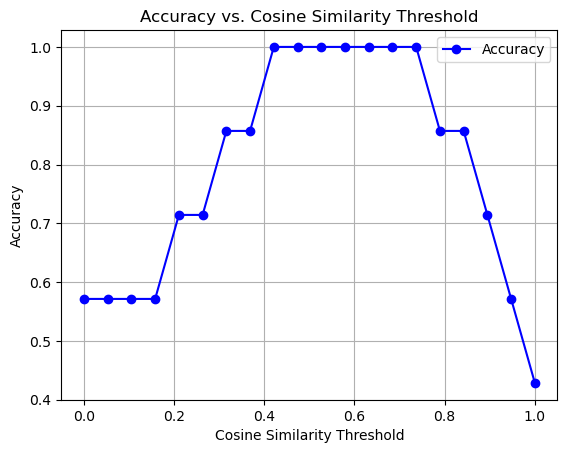

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import cosine_similarity

# Example: Movies dataset and user preferences (for simplicity)
movies = pd.read_csv('tmdb_5000_movies.csv')  # Replace with your movies dataset
user_likes = [1, 0, 1, 0, 1, 0, 1]  # Example: True labels indicating whether the user liked a movie (1 = liked, 0 = not liked)

# Example: Cosine similarity scores for a movie (replace with actual cosine similarity values)
cosine_similarities = [0.85, 0.4, 0.92, 0.3, 0.75, 0.2, 0.95]  # Example: Predicted similarity scores

# Function to calculate accuracy based on a threshold
def calculate_accuracy(threshold):
    predictions = [1 if sim > threshold else 0 for sim in cosine_similarities]
    accuracy = accuracy_score(user_likes, predictions)
    return accuracy

# List of threshold values to test
thresholds = np.linspace(0, 1, 20)

# Calculate accuracy for each threshold
accuracies = [calculate_accuracy(threshold) for threshold in thresholds]

# Plot the accuracy graph
plt.plot(thresholds, accuracies, marker='o', color='b', label='Accuracy')
plt.title('Accuracy vs. Cosine Similarity Threshold')
plt.xlabel('Cosine Similarity Threshold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

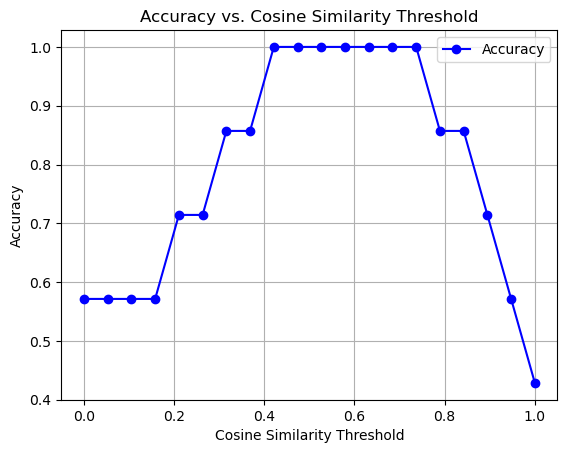

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score

# Sample data: Movie titles, user ratings (True Labels), and cosine similarity scores
# Replace with your own dataset and predictions (cosine similarity)
movies = pd.DataFrame({
    'movie_id': [1, 2, 3, 4, 5, 6, 7],
    'title': ['Movie A', 'Movie B', 'Movie C', 'Movie D', 'Movie E', 'Movie F', 'Movie G']
})

# Example: True labels (1 = liked, 0 = not liked by the user)
user_likes = [1, 0, 1, 0, 1, 0, 1]  # This can come from user rating data

# Example: Predicted cosine similarities (higher similarity = more likely to be recommended)
cosine_similarities = [0.85, 0.40, 0.92, 0.30, 0.75, 0.20, 0.95]

# Function to calculate accuracy for a given threshold
def calculate_accuracy(threshold):
    # Predictions: 1 if similarity is greater than threshold, otherwise 0
    predictions = [1 if sim >= threshold else 0 for sim in cosine_similarities]
    # Calculate accuracy based on true labels and predictions
    accuracy = accuracy_score(user_likes, predictions)
    return accuracy

# List of thresholds to test (0 to 1)
thresholds = np.linspace(0, 1, 20)

# Calculate accuracy for each threshold
accuracies = [calculate_accuracy(threshold) for threshold in thresholds]

# Plot the accuracy graph
plt.plot(thresholds, accuracies, marker='o', color='b', label='Accuracy')
plt.title('Accuracy vs. Cosine Similarity Threshold')
plt.xlabel('Cosine Similarity Threshold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()